In [1]:
# Data Cleaning (Phase 1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the file
df = pd.read_csv('Diabetes.csv')
df.head()

,patient_id,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,...,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,insulin_level,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,1,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215.0,...,30.5,0.89,134.0,78,68,239,6.36,29.6,Type 2,1
1,2,48,Female,White,Highschool,Middle,Employed,Former,1,143.0,...,23.1,0.80,129.0,76,67,116,2.00,23.0,No Diabetes,0
2,3,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57.0,...,22.2,0.81,115.0,73,74,213,5.07,44.7,Type 2,1
3,4,74,Female,Black,Highschool,Low,Retired,Never,0,49.0,...,26.8,0.88,120.0,93,68,171,5.28,38.2,Type 2,1
4,5,46,Male,White,Graduate,Middle,Retired,Never,1,109.0,...,21.2,0.78,92.0,67,67,210,12.74,23.5,Type 2,1


In [4]:
#find duplicated records
df.duplicated().sum
df[df.duplicated(keep=False)]

,patient_id,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,...,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,insulin_level,diabetes_risk_score,diabetes_stage,diagnosed_diabetes


In [5]:
#check for missing values
columns_to_check = [
    'bmi', 'systolic_bp', 'diastolic_bp', 'heart_rate', 
    'cholesterol_total', 'insulin_level', 'waist_to_hip_ratio', 
    'sleep_hours_per_day'
]
flag = True
for col in columns_to_check:
    zeroes = (df[col] == 0).sum()
    if zeroes > 0:
        flag = False
        zero_percent = (zeroes/len(df)) * 100
        print(f"'{col}': {zero_count} zeros ({zero_percentage:.2f}%)")
if flag:
    print('No Zeroes' )


No Zeroes


In [6]:
missing_counts = df.isnull().sum()
print(missing_counts)

patient_id                            0
age                                   0
gender                                1
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        1
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    1
diet_score                            0
sleep_hours_per_day                   1
screen_time_hours_per_day             0
family_history_diabetes               1
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           1
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
insulin_level                         0
diabetes_risk_score                   0
diabetes_stage                        2
diagnosed_diabetes                    0
dtype: int64


In [7]:
# Imputing values in numerical columns
median_val = df[col].median()
df[col] = df[col].fillna(median_val)


In [8]:
#filling values in categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols_to_impute = df[categorical_cols].columns[df[categorical_cols].isnull().any()].tolist()
for col in categorical_cols_to_impute:
    mode_val = df[col].mode()[0] 
    df[col] = df[col].fillna(mode_val)

In [9]:
# columns with missing values left
problem_cols = [
    'physical_activity_minutes_per_week', 
    'sleep_hours_per_day', 
    'family_history_diabetes', 
    'systolic_bp'
]
for col in problem_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
for col in problem_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)


In [10]:
# Checking if any missing values left
missing_counts = df.isnull().sum()
print(missing_counts)

patient_id                            0
age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
insulin_level                         0
diabetes_risk_score                   0
diabetes_stage                        0
diagnosed_diabetes                    0
dtype: int64


In [11]:
#removing outliers
numerical_cols = [
    'age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 
    'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 
    'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 
    'cholesterol_total', 'insulin_level', 'diabetes_risk_score'
]

initial_rows = len(df)
outlier_indices = set()

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - (2.5 * IQR)
    upper_bound = Q3 + (2.5 * IQR)

    outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outlier_indices.update(outliers_in_col)

rows_to_drop = len(outlier_indices)

df = df.drop(outlier_indices, axis=0).reset_index(drop=True)

rows_removed = initial_rows - len(df)

print(f" {rows_removed} observations removed.")
print(f"The DataFrame has {len(df)} rows.")

 35 observations removed.
The DataFrame has 4965 rows.


In [12]:
# removing impossible values and checking distribution of Diagnosed diabetes
df = df[df['diagnosed_diabetes'] != 2].reset_index(drop=True)
target_counts = df['diagnosed_diabetes'].value_counts()
target_percentages = df['diagnosed_diabetes'].value_counts(normalize=True) * 100

print("--- Counts of Diagnosed Diabetes ---")
print(target_counts)
print("\n--- Percentage Distribution ---")
print(target_percentages.round(2).astype(str) + '%')

--- Counts of Diagnosed Diabetes ---
diagnosed_diabetes
1    3025
0    1939
Name: count, dtype: int64

--- Percentage Distribution ---
diagnosed_diabetes
1    60.94%
0    39.06%
Name: proportion, dtype: object


# Data Visualization (Phase 2)

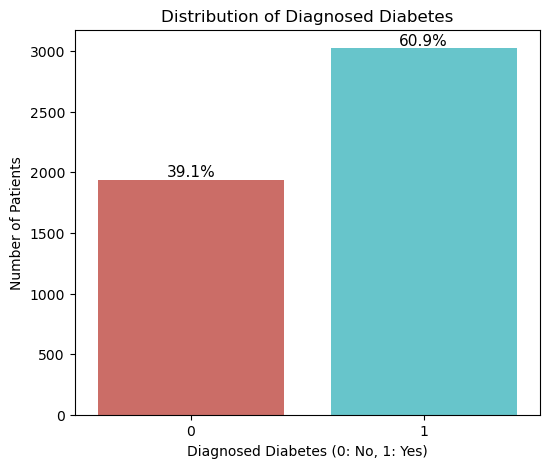

In [14]:
# Checking for imbalance
plt.figure(figsize=(6, 5))

ax = sns.countplot(
    x='diagnosed_diabetes', 
    data=df, 
    palette='hls',
    hue='diagnosed_diabetes',  
    legend=False               
)

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=11)

plt.title('Distribution of Diagnosed Diabetes')
plt.xlabel('Diagnosed Diabetes (0: No, 1: Yes)')
plt.ylabel('Number of Patients')
plt.show()

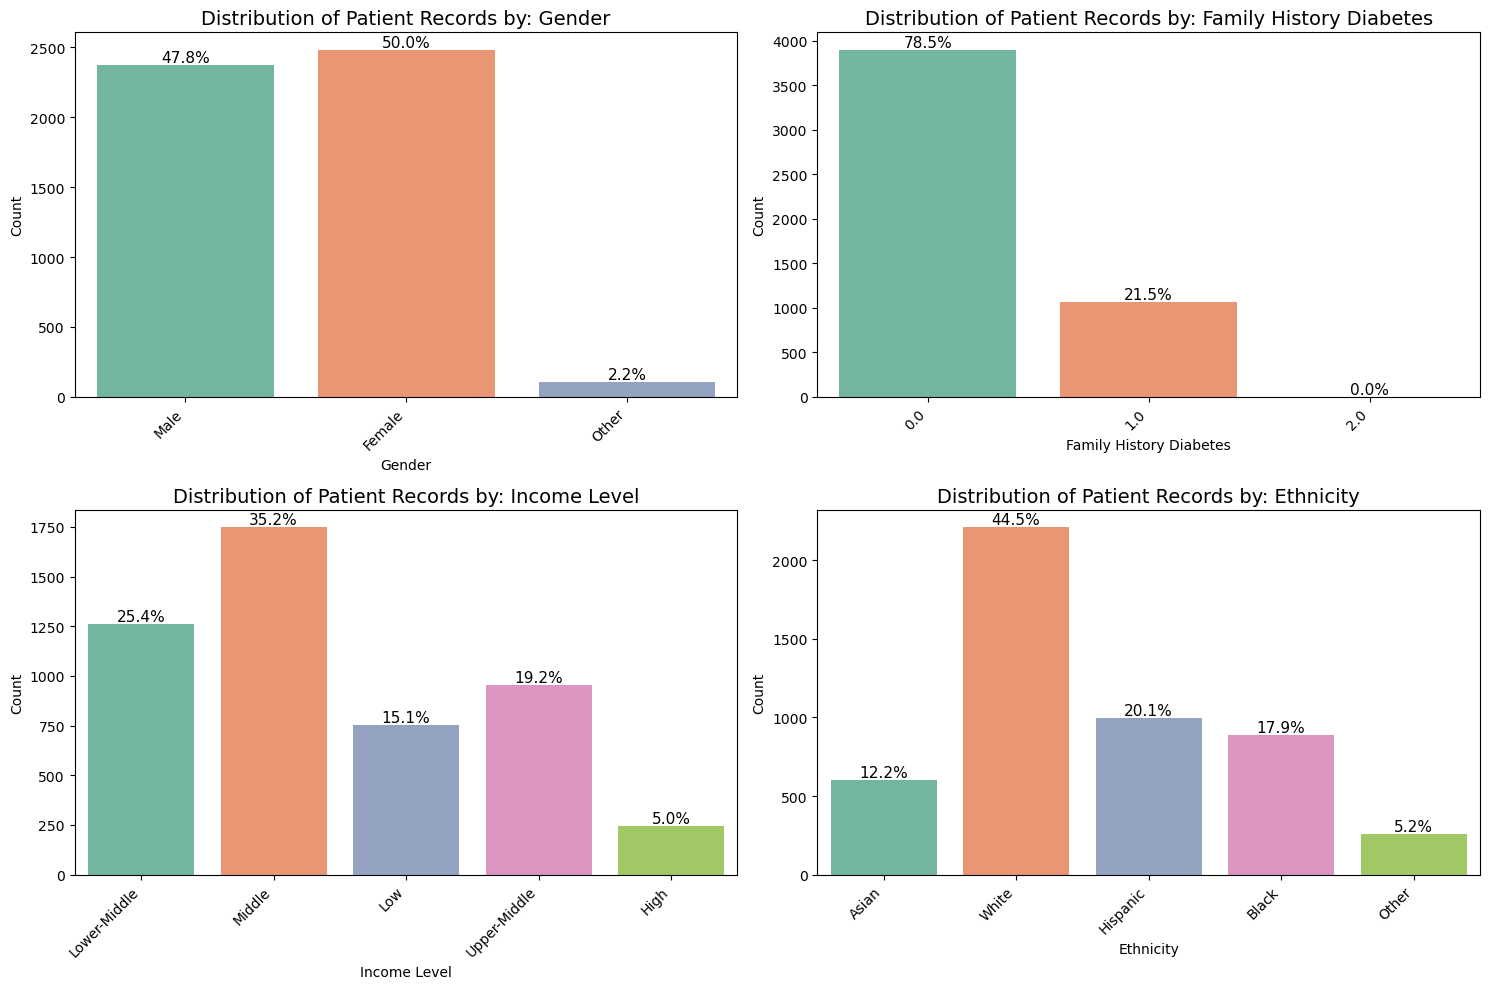

In [15]:
#Distribution of Patients w.r.t categorical values
categorical_features = [
    'gender', 
    'family_history_diabetes', 
    'income_level', 
    'ethnicity'
]

num_features = len(categorical_features)

n_cols = 2
n_rows = (num_features + n_cols - 1) // n_cols 

plt.figure(figsize=(15, 5 * n_rows))
plt.subplots_adjust(hspace=0.4) 

for i, col in enumerate(categorical_features):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    
    sns.countplot(
        x=col, 
        data=df, 
        palette='Set2',  
        hue=col,
        legend=False
    )
    for p in ax.patches:
        height = p.get_height()
        percentage = '{:.1f}%'.format(100 * height / total)      
        
        ax.annotate(
            percentage, 
            (p.get_x() + p.get_width() / 2., height), 
            ha='center', 
            va='bottom', 
            fontsize=11
        )
   
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribution of Patient Records by: {col.replace("_", " ").title()}', fontsize=14)
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Count')

plt.tight_layout() 
plt.show()

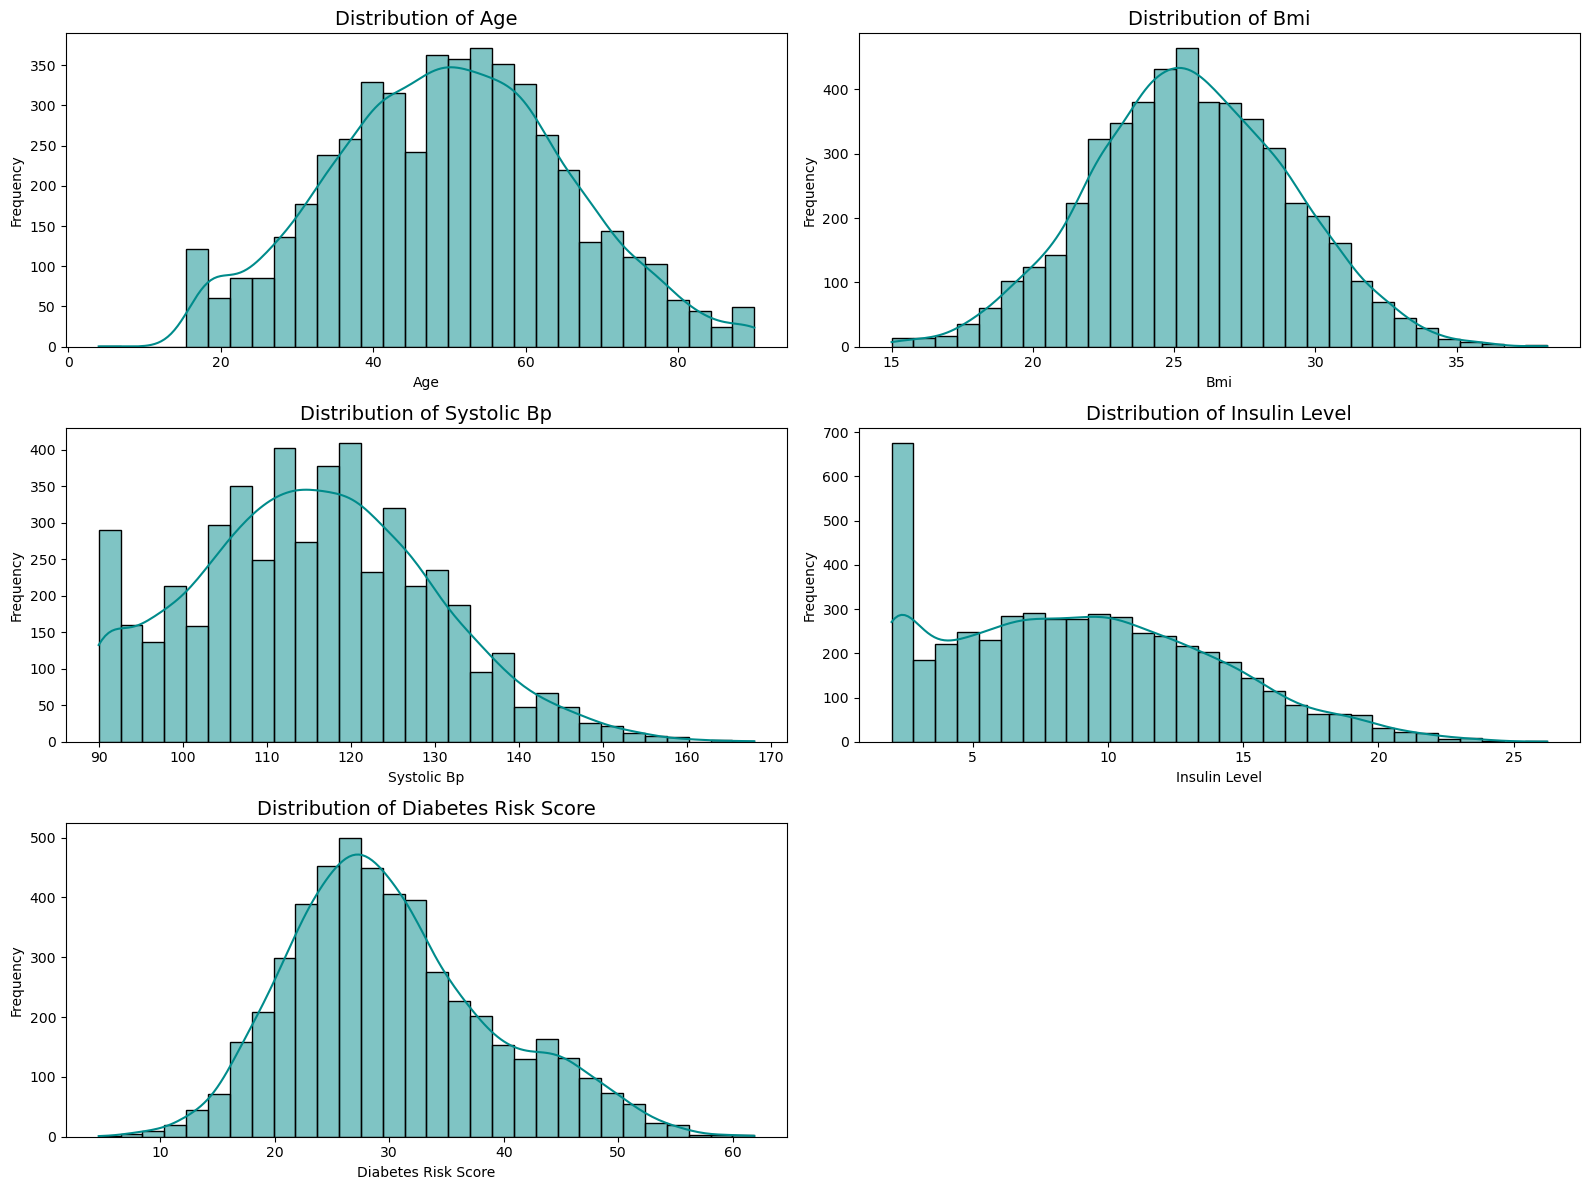

In [16]:
#Potential predictors for diabetes
continuous_features = [
    'age', 
    'bmi', 
    'systolic_bp', 
    'insulin_level', 
    'diabetes_risk_score'
]

num_features = len(continuous_features)
n_cols = 2 
n_rows = (num_features + n_cols - 1) // n_cols 

plt.figure(figsize=(16, 4 * n_rows))
plt.subplots_adjust(hspace=0.4) 

for i, col in enumerate(continuous_features):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    
    sns.histplot(
        data=df, 
        x=col, 
        kde=True, 
        bins=30,  
        color='darkcyan'
    )
    
    plt.title(f'Distribution of {col.replace("_", " ").title()}', fontsize=14)
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

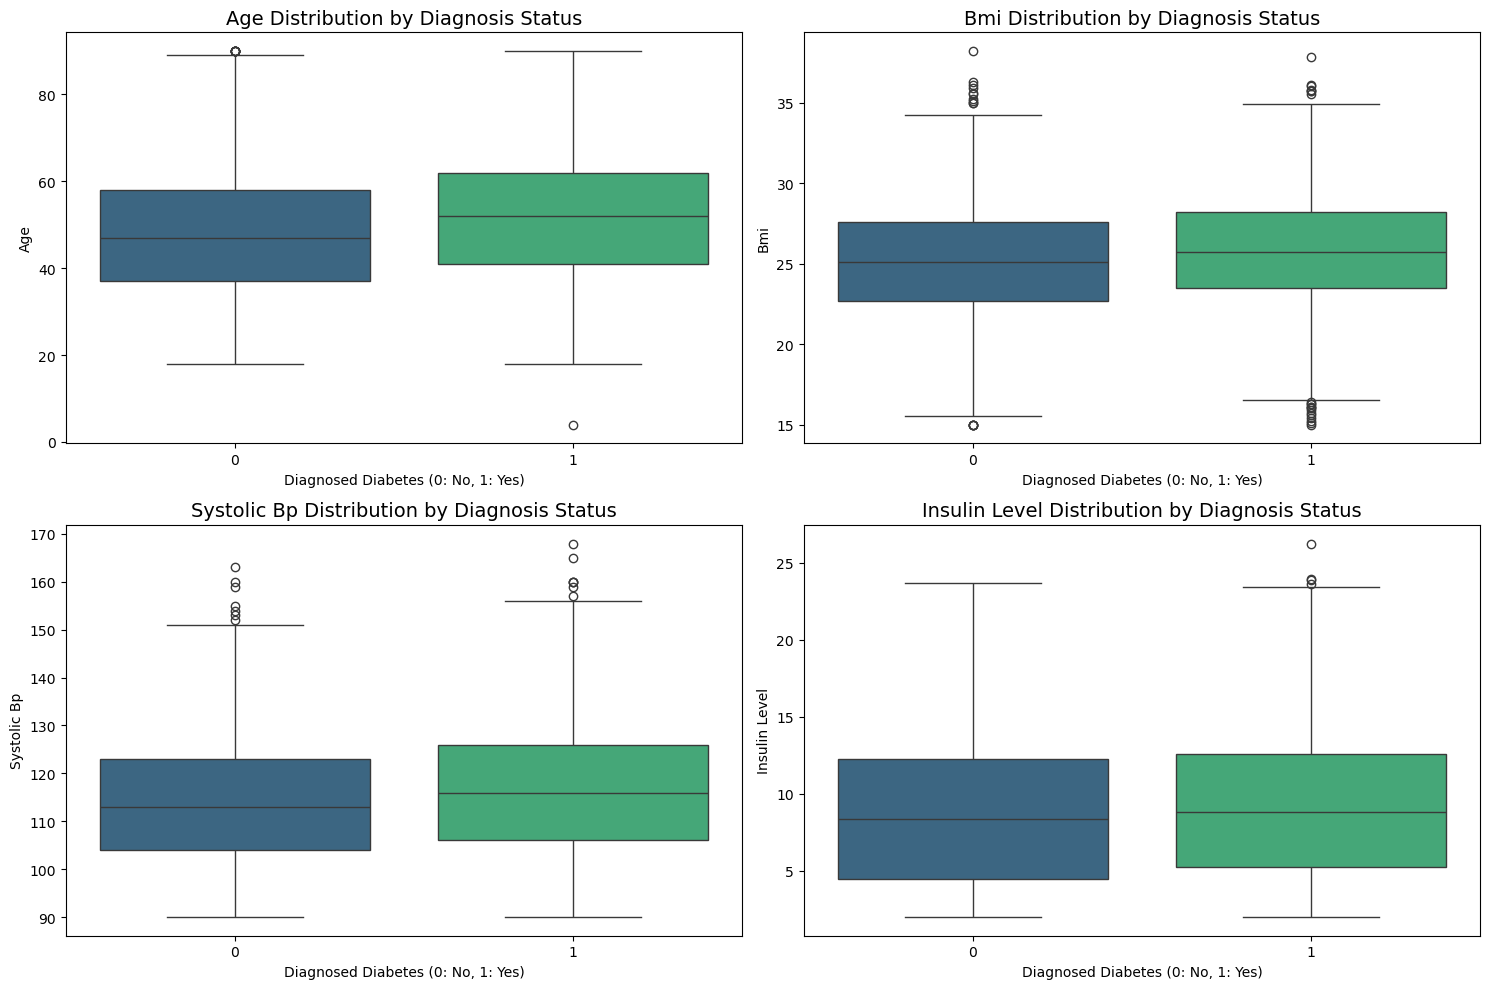

In [17]:
#Check if the central tendency and spread of continuous features are significantly different between the two classes of target variable
continuous_features = [
    'age', 
    'bmi', 
    'systolic_bp', 
    'insulin_level'
]

num_features = len(continuous_features)
n_cols = 2 
n_rows = (num_features + n_cols - 1) // n_cols 

plt.figure(figsize=(15, 5 * n_rows))
plt.subplots_adjust(hspace=0.4, wspace=0.3) 

for i, col in enumerate(continuous_features):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    
    
    sns.boxplot(
        x='diagnosed_diabetes',  
        y=col,                   
        data=df, 
        palette='viridis',
        hue='diagnosed_diabetes', 
        legend=False,             
        ax=ax
    )
    
    plt.title(f'{col.replace("_", " ").title()} Distribution by Diagnosis Status', fontsize=14)
    plt.xlabel('Diagnosed Diabetes (0: No, 1: Yes)')
    plt.ylabel(col.replace("_", " ").title())

plt.tight_layout()
plt.show()

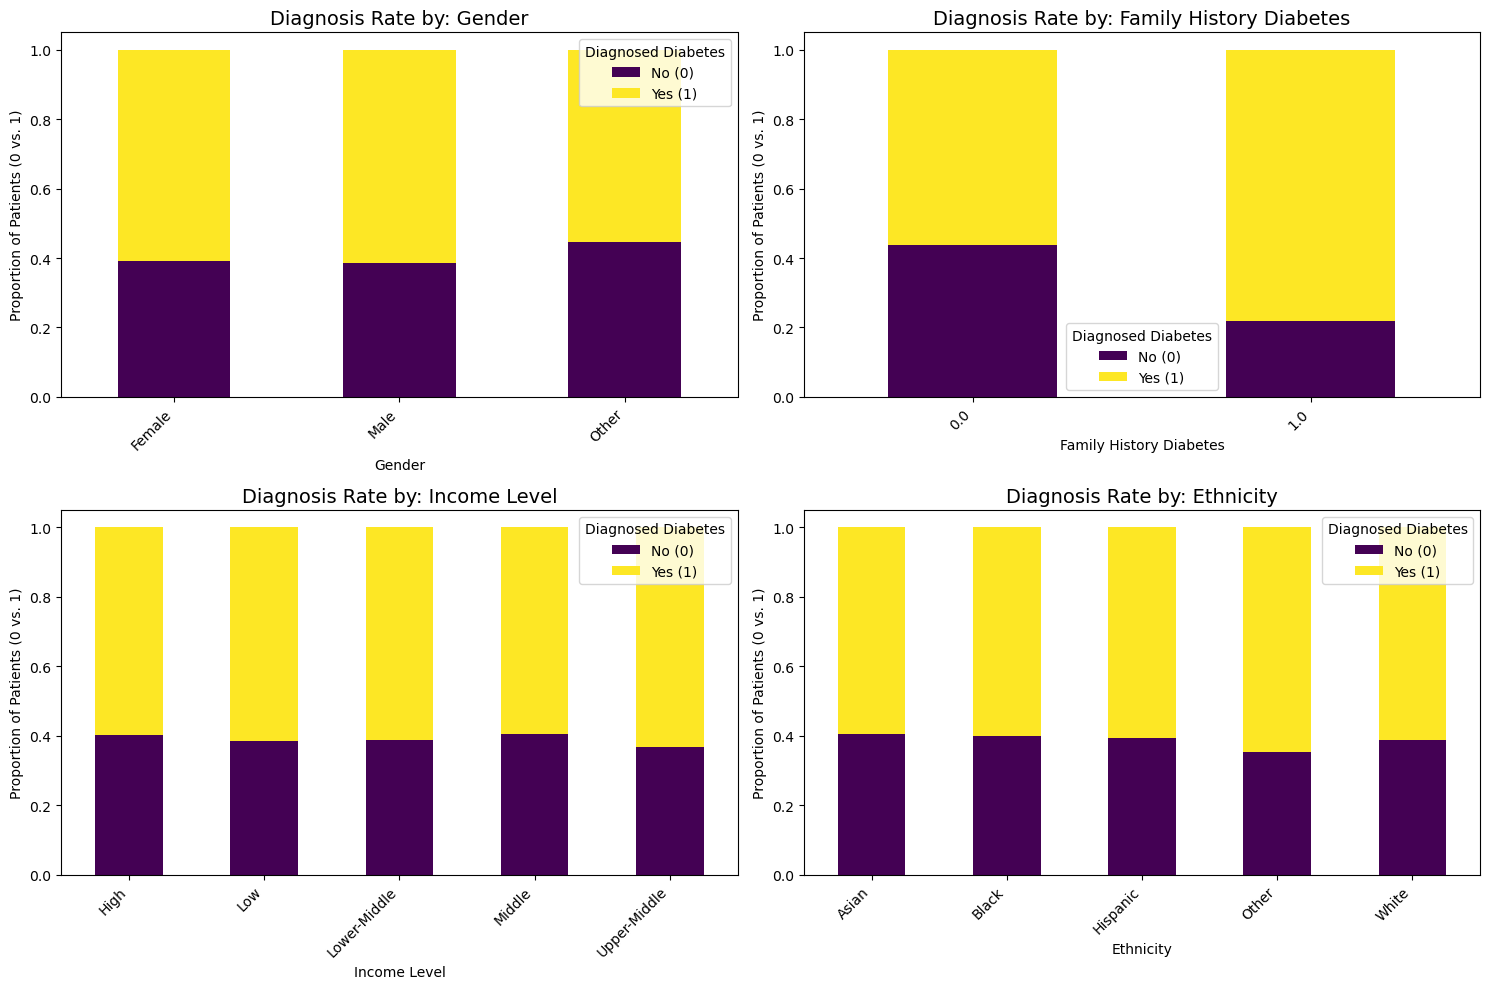

In [18]:
#relationship between categorical features and target variable,
df = df[df['family_history_diabetes'] != 2].reset_index(drop=True)
categorical_features = [
    'gender', 
    'family_history_diabetes', 
    'income_level', 
    'ethnicity'
]

num_features = len(categorical_features)
n_cols = 2 
n_rows = (num_features + n_cols - 1) // n_cols 

plt.figure(figsize=(15, 5 * n_rows))
plt.subplots_adjust(hspace=0.6, wspace=0.3) 

for i, col in enumerate(categorical_features):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    

    cross_tab = pd.crosstab(df[col], df['diagnosed_diabetes'])
    

    cross_tab_pct = cross_tab.div(cross_tab.sum(1).astype(float), axis=0)
    

    cross_tab_pct.plot(
        kind='bar', 
        stacked=True, 
        ax=ax, 
        colormap='viridis' 
    )
    
    ax.set_title(f'Diagnosis Rate by: {col.replace("_", " ").title()}', fontsize=14)
    ax.set_xlabel(col.replace("_", " ").title())
    ax.set_ylabel('Proportion of Patients (0 vs. 1)')
    ax.legend(title='Diagnosed Diabetes', labels=['No (0)', 'Yes (1)'])
    plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()

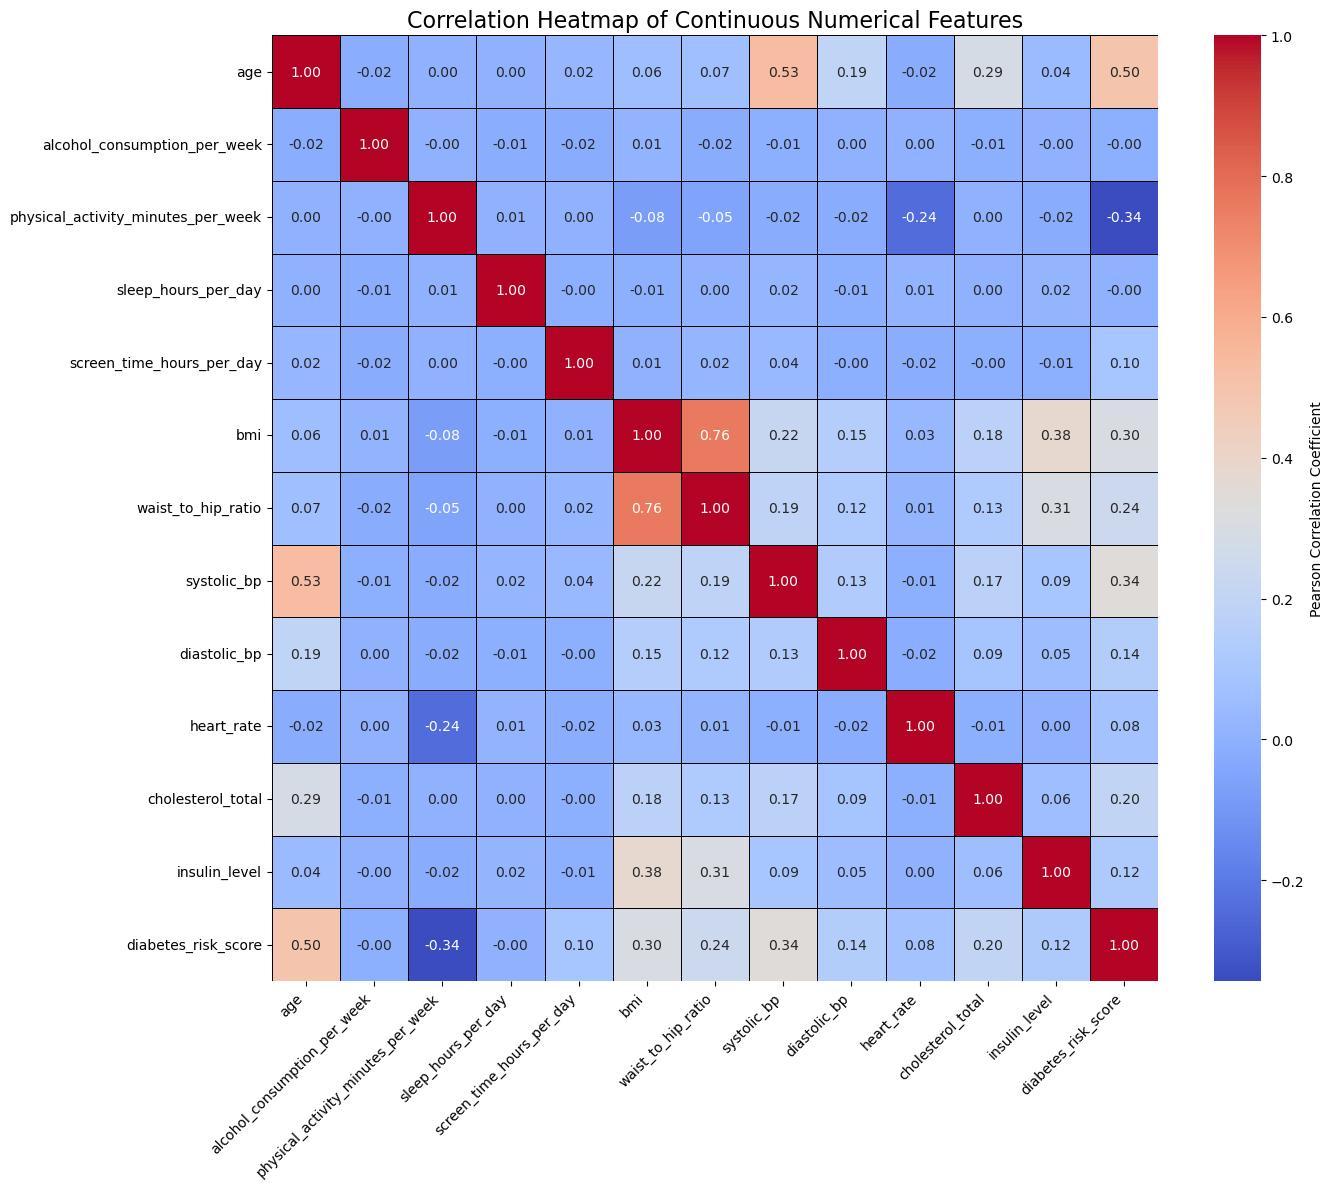

In [19]:
# checking the correlation of the features w.r.t each other using Heatmap
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(14, 12))

sns.heatmap(
    correlation_matrix,
    annot=True,        
    fmt=".2f",         
    cmap='coolwarm',   
    linewidths=.5,     
    linecolor='black',
    cbar_kws={'label': 'Pearson Correlation Coefficient'} 
)

plt.title('Correlation Heatmap of Continuous Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Data Modelling (Phase 3)

In [21]:
#Merging Tyoe 1,Type 22 and Type 3 into Type 2.
target_cols = ['diagnosed_diabetes', 'diabetes_stage', 'diabetes_risk_score']
df['diabetes_stage'] = df['diabetes_stage'].replace(['Type 1', 'Type 22', 'Type3'], 'Type 2')


print("Final stabilized class counts:\n", df['diabetes_stage'].value_counts())

X_train = df.drop(columns=target_cols + ['patient_id'])
Y_binary_train = df['diagnosed_diabetes']
Y_multi_train = df['diabetes_stage']
Y_reg_train = df['diabetes_risk_score']

print(f"\nFeature Set (X) defined with {X_train.shape[1]} columns.")

Final stabilized class counts:
 diabetes_stage
Type 2          3021
Pre-Diabetes    1509
No Diabetes      416
Gestational       17
Name: count, dtype: int64

Feature Set (X) defined with 20 columns.


In [22]:
try:
    test_df = pd.read_csv('Diabetes_test.csv')
except FileNotFoundError:
    print("Error: Diabetes_test.csv not found. Please verify file name/path.")
    raise

target_cols = ['diagnosed_diabetes', 'diabetes_stage', 'diabetes_risk_score']
test_df = test_df.drop(columns=['Patient ID'])


rare_classes = ['Type 1', 'Type 22', 'Type3']
target_col_name = 'diabetes_stage'

test_df[target_col_name] = test_df[target_col_name].replace(rare_classes, 'Type 2')

X_test = test_df.drop(columns=target_cols)
Y_binary_test = test_df['diagnosed_diabetes']
Y_multi_test = test_df[target_col_name]
Y_reg_test = test_df['diabetes_risk_score']

print(f"X_test shape: {X_test.shape}")

X_test shape: (2000, 20)


In [23]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [24]:
# Creating Pipeline to process training and test data
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

preprocessor.fit(X_train) 

X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\n--- Feature Preprocessing Complete ---")
print(f"X_train processed shape: {X_train_processed.shape}")
print(f"X_test processed shape: {X_test_processed.shape}")


--- Feature Preprocessing Complete ---
X_train processed shape: (4963, 40)
X_test processed shape: (2000, 40)


In [25]:
# Logistic regression to predict whether the person has diabetes
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer


lr_model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
roc_auc_scorer = make_scorer(roc_auc_score)


print("5-Fold CV for Logistic Regression")
cv_scores_lr = cross_val_score(
    lr_model,
    X_train_processed,
    Y_binary_train,
    cv=5,
    scoring=roc_auc_scorer,
    n_jobs=-1
)

lr_model.fit(X_train_processed, Y_binary_train)
Y_binary_pred_lr = lr_model.predict(X_test_processed)


test_roc_auc = roc_auc_score(Y_binary_test, Y_binary_pred_lr)

print("\n1. Logistic Regression Results")
print(f"5-Fold CV ROC AUC: {cv_scores_lr.mean():.4f} (±{cv_scores_lr.std():.4f})")
print(f"Test Set ROC AUC: {test_roc_auc:.4f}")

5-Fold CV for Logistic Regression

1. Logistic Regression Results
5-Fold CV ROC AUC: 0.6073 (±0.0236)
Test Set ROC AUC: 0.6180


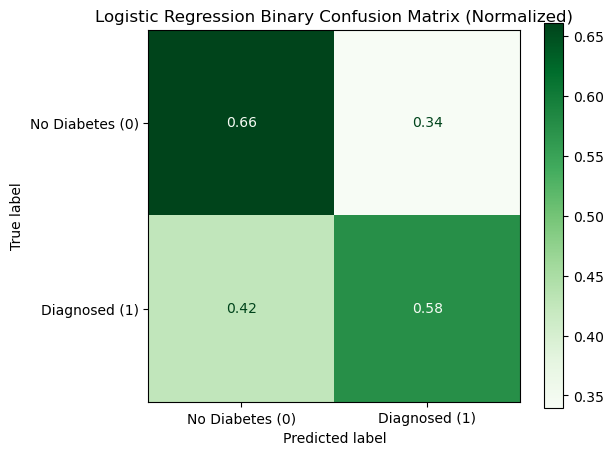

In [26]:
# Creating the confusion matrix to view predictions 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_logreg = confusion_matrix(Y_binary_test, Y_binary_pred_lr)

cm_normalized_logreg = cm_logreg.astype('float') / cm_logreg.sum(axis=1)[:, np.newaxis]

class_labels = ['No Diabetes (0)', 'Diagnosed (1)']

plt.figure(figsize=(6, 5))
cm_display_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_normalized_logreg, display_labels=class_labels)
cm_display_logreg.plot(cmap=plt.cm.Greens, values_format='.2f', ax=plt.gca())

plt.title('Logistic Regression Binary Confusion Matrix (Normalized)')
plt.show()

In [27]:
# Using KNN to predict the type of diabetes 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=5)

print("5-Fold CV for K-Nearest Neighbors")
cv_scores_knn = cross_val_score(
    knn_model,
    X_train_processed,
    Y_multi_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

knn_model.fit(X_train_processed, Y_multi_train)
Y_multi_pred_knn = knn_model.predict(X_test_processed)

test_accuracy = accuracy_score(Y_multi_test, Y_multi_pred_knn)

print("\n 2. K-Nearest Neighbors Results")
print(f"5-Fold CV Accuracy: {cv_scores_knn.mean():.4f} (±{cv_scores_knn.std():.4f})")
print(f"Test Set Accuracy: {test_accuracy:.4f}")

5-Fold CV for K-Nearest Neighbors

 2. K-Nearest Neighbors Results
5-Fold CV Accuracy: 0.5432 (±0.0143)
Test Set Accuracy: 0.5410


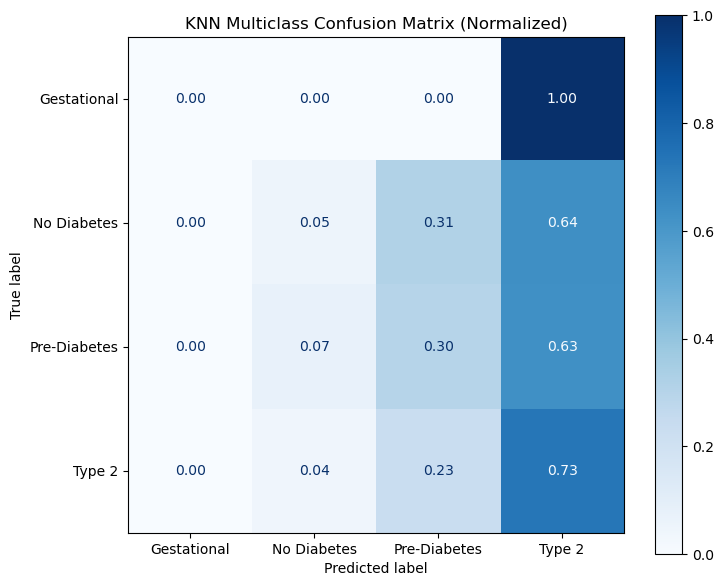

In [28]:
# Creating the confusion matrix to view predictions
cm_knn = confusion_matrix(Y_multi_test, Y_multi_pred_knn)

cm_normalized_knn = cm_knn.astype('float') / cm_knn.sum(axis=1)[:, np.newaxis]

class_labels = sorted(np.unique(Y_multi_test)) 

plt.figure(figsize=(8, 7))
cm_display_knn = ConfusionMatrixDisplay(confusion_matrix=cm_normalized_knn, display_labels=class_labels)
cm_display_knn.plot(cmap=plt.cm.Blues, values_format='.2f', ax=plt.gca())

plt.title('KNN Multiclass Confusion Matrix (Normalized)')
plt.show()

In [29]:
# Predicting the diabetes risk score using ridge regression (for Normalization)
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from numpy import sqrt

ridge_model = Ridge(alpha=1.0, random_state=42)
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

print("5-Fold CV for Ridge Regression")
cv_scores_ridge = cross_val_score(
    ridge_model,
    X_train_processed,
    Y_reg_train,
    cv=5,
    scoring=rmse_scorer,
    n_jobs=-1
)

ridge_model.fit(X_train_processed, Y_reg_train)
Y_reg_pred_ridge = ridge_model.predict(X_test_processed)

cv_rmse = sqrt(-cv_scores_ridge.mean())
test_rmse = sqrt(mean_squared_error(Y_reg_test, Y_reg_pred_ridge))

print("\n 3. Ridge Regression Results ")
print(f"5-Fold CV RMSE: {cv_rmse:.4f}")
print(f"Test Set RMSE: {test_rmse:.4f}")


5-Fold CV for Ridge Regression

 3. Ridge Regression Results 
5-Fold CV RMSE: 1.2398
Test Set RMSE: 1.2454


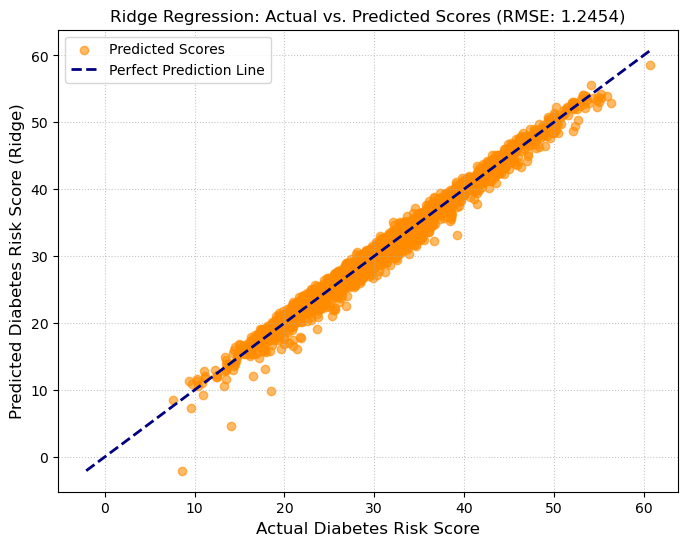

In [30]:
# Creating model to view the results of the predicted values of risk score
plt.figure(figsize=(8, 6))


plt.scatter(
    Y_reg_test, 
    Y_reg_pred_ridge, 
    alpha=0.6, 
    color='darkorange', 
    label='Predicted Scores'
)

max_val = max(Y_reg_test.max(), Y_reg_pred_ridge.max())
min_val = min(Y_reg_test.min(), Y_reg_pred_ridge.min())
plt.plot(
    [min_val, max_val], 
    [min_val, max_val], 
    color='navy', 
    linestyle='--', 
    lw=2, 
    label='Perfect Prediction Line'
)

plt.xlabel('Actual Diabetes Risk Score', fontsize=12)
plt.ylabel('Predicted Diabetes Risk Score (Ridge)', fontsize=12)
plt.title('Ridge Regression: Actual vs. Predicted Scores (RMSE: 1.2454)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

## Low Score Reason

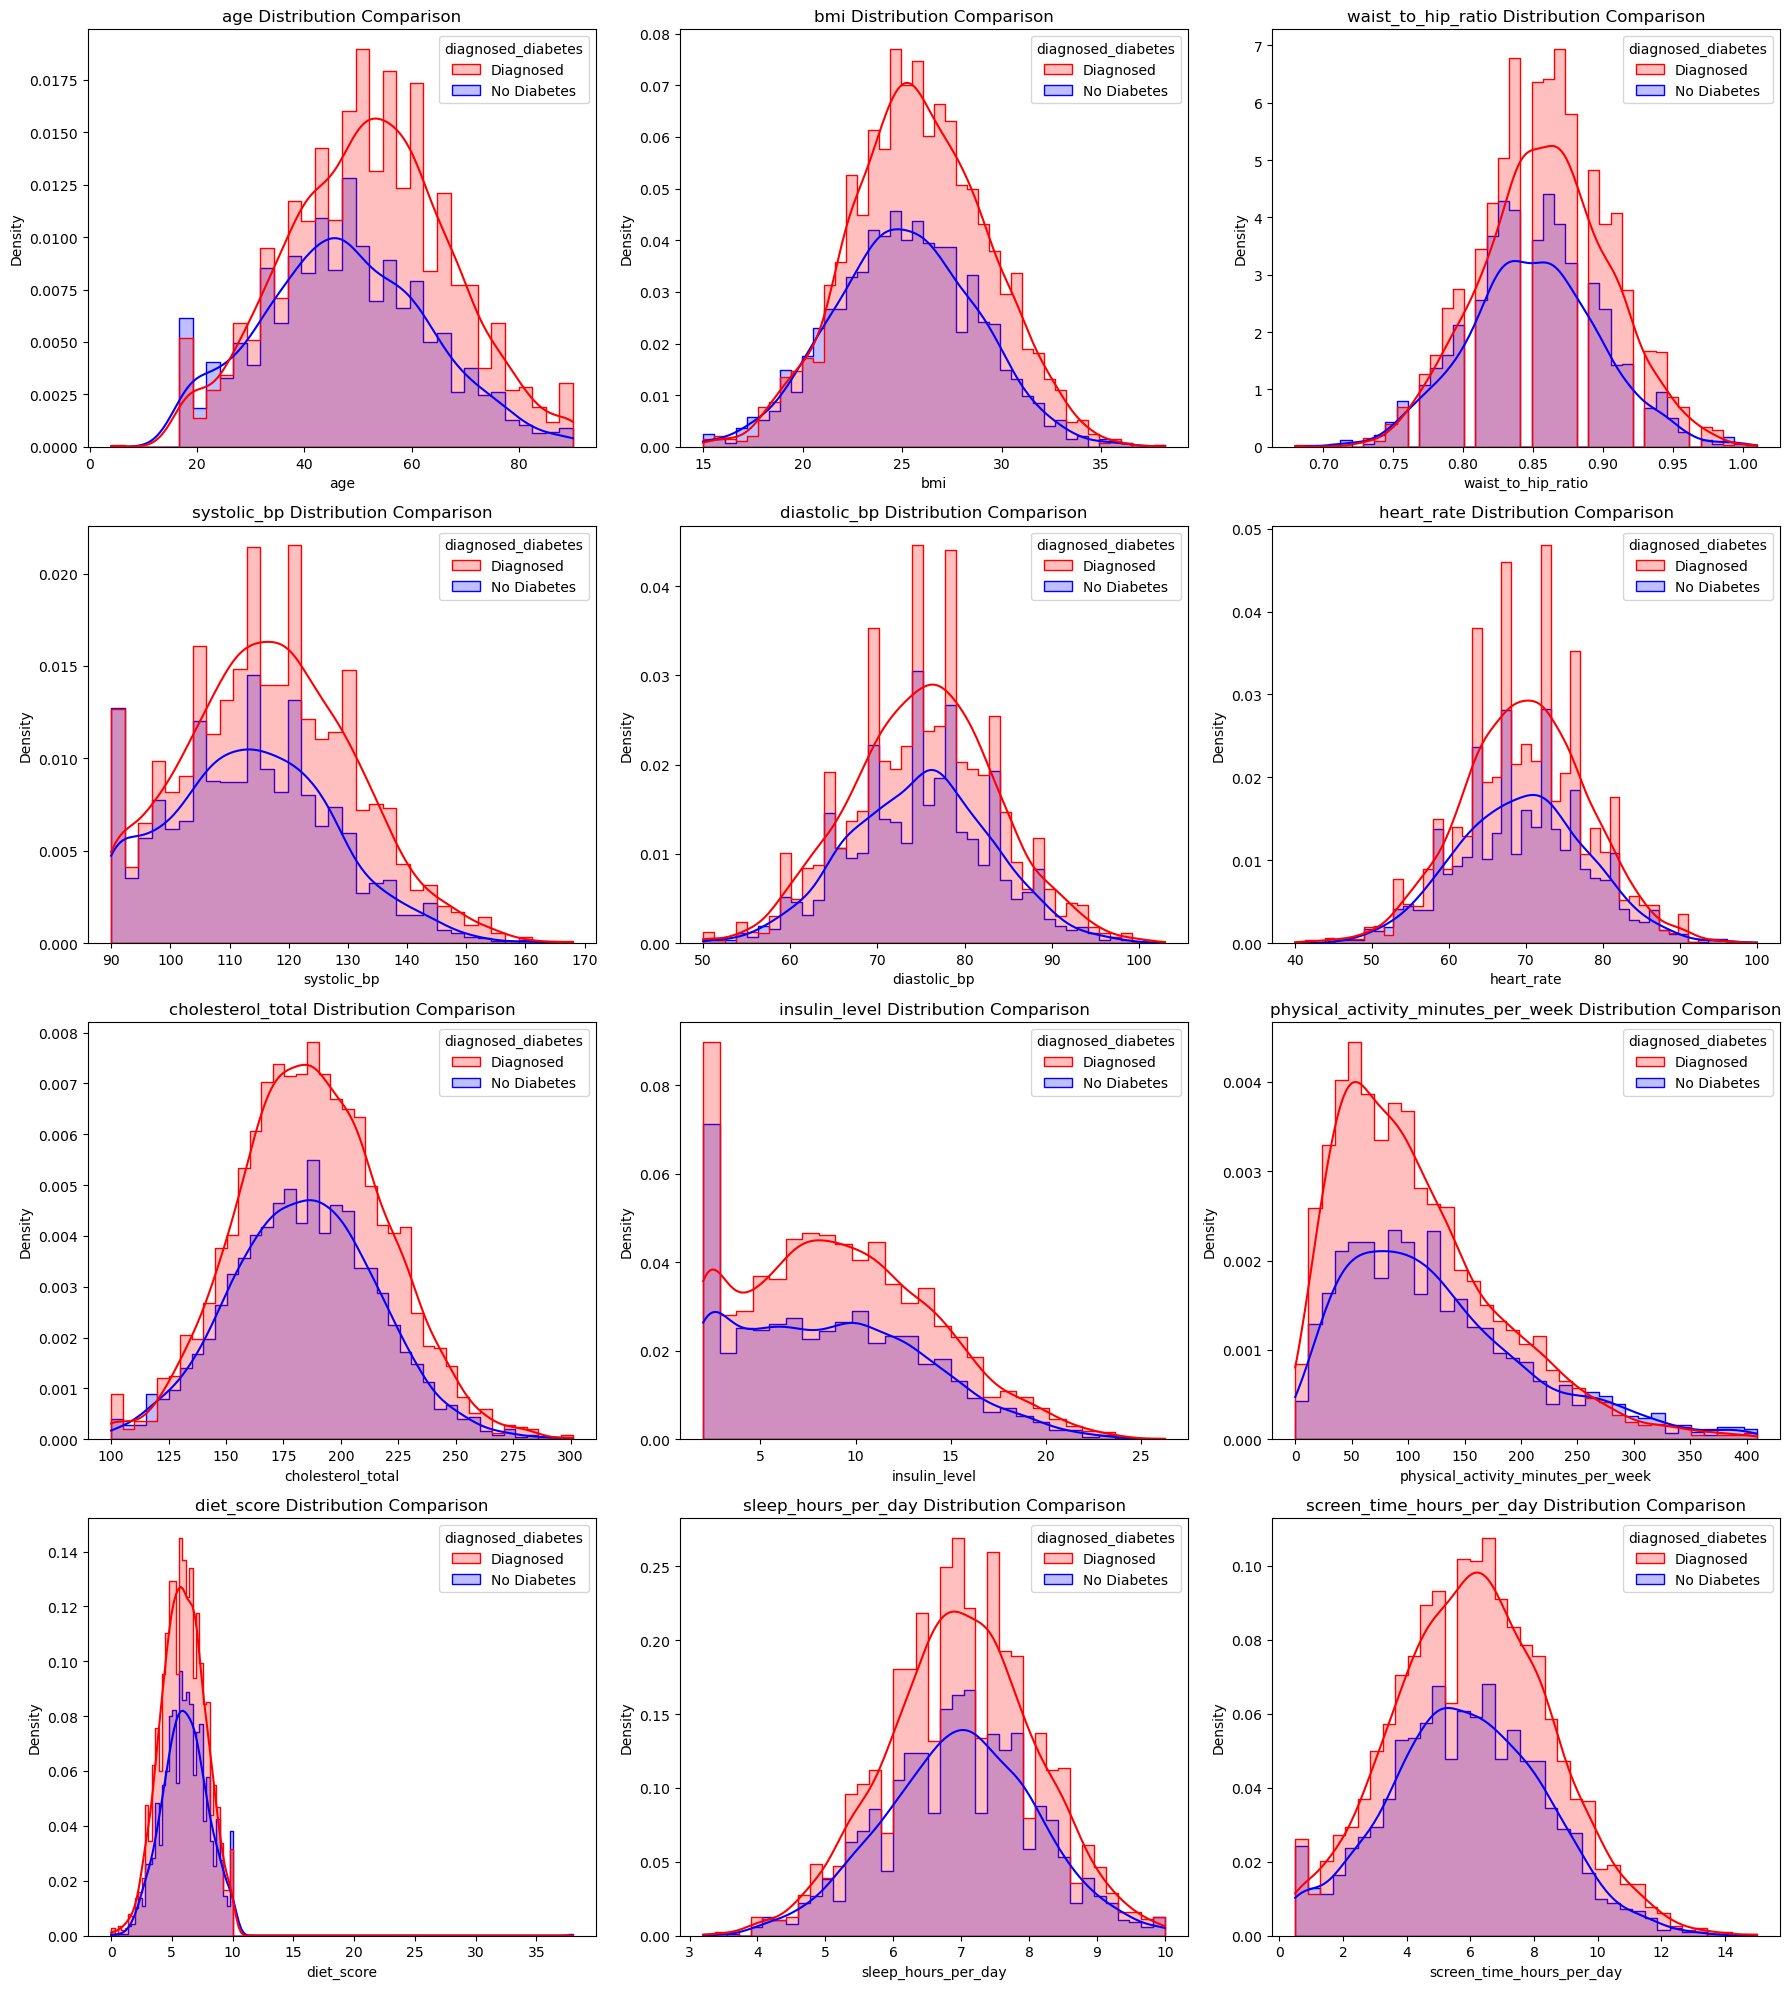

In [32]:
# checking why 

numerical_cols_to_plot = [
    'age',
    'bmi',
    'waist_to_hip_ratio',
    'systolic_bp',
    'diastolic_bp',
    'heart_rate',
    'cholesterol_total',
    'insulin_level',
    'physical_activity_minutes_per_week',
    'diet_score',
    'sleep_hours_per_day',
    'screen_time_hours_per_day'
]

try:
    if isinstance(Y_binary_train, np.ndarray):
        Y_binary_series = pd.Series(Y_binary_train.flatten(), index=X_train.index)
    else:
        Y_binary_series = Y_binary_train

    df_plot = X_train[numerical_cols_to_plot].copy()
    df_plot['diagnosed_diabetes'] = Y_binary_series.astype(int)

    df_plot['diagnosed_diabetes'] = df_plot['diagnosed_diabetes'].map({0: 'No Diabetes', 1: 'Diagnosed'})

except NameError:
    print("Error: X_train or Y_binary_train is not defined in the current environment. Please run your data loading and splitting code first.")
    raise

num_plots = len(numerical_cols_to_plot)
rows = int(np.ceil(num_plots / 3))
cols = min(3, num_plots)

fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols_to_plot):
    sns.histplot(
        data=df_plot,
        x=col,
        hue='diagnosed_diabetes',
        ax=axes[i],
        kde=True, 
        palette={'No Diabetes': 'blue', 'Diagnosed': 'red'},
        element='step',
        stat='density' 
    )
    axes[i].set_title(f'{col} Distribution Comparison', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density', fontsize=10)

for j in range(num_plots, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Conclusion

#### 1. Data Preparation and Visualization

The initial **Data Cleaning** phase was crucial for addressing extreme outliers and ensuring data quality. The subsequent **Data Visualization** phase, particularly the comparison of numerical feature distributions, clearly demonstrated the significant overlap between the 'Diagnosed' and 'Undiagnosed' groups. This visual evidence served as a vital precursor, suggesting that achieving high accuracy would be challenging.
#### 2. Predictive Modeling Results

* **Regression Task (Diabetes Risk Score):** The prediction of the continuous Diabetes Risk Score proved highly successful. Using **Ridge Regression**  to manage multicollinearity, the model achieved a Test Set **RMSE of $1.2454$**. Given the target variable's range of $0$ to $100$, this small error signifies excellent predictive power and stability, making the score a reliable metric for quantifying individual patient risk.

* **Binary Classification Task (Diagnosis Yes/No):** To predict whether a person had diabetes, **Logistic Regression** was employed. The model achieved a Test Set **ROC AUC of $0.6180$**. While better than random guessing, this suboptimal score directly reflects the visual similarity observed in the dataset: the feature distributions for the diagnosed and undiagnosed groups are highly similar, limiting the model's ability to confidently separate the two classes.

* **Multiclass Classification Task (Diabetes Type Prediction):** **K-Nearest Neighbors (KNN)** was used to predict the specific type of diabetes. The model yielded a low accuracy of **$0.514$**. This poor result further underscores the difficulty of the prediction task, specifically due to the **class imbalance** in the dataset, where Type 2 diabetes records heavily outnumbered all other types. The simple, distance-based approach of KNN  struggled significantly under these imbalanced conditions.

#### 3. Overall Conclusion

The project shows that while quantifying diabetes risk is highly feasible, predicting specific classifications is difficult becuase of the nature of the data. The close similarity of feature distributions and the imbalance of the type-specific records required the use of regularization (Ridge Regression) for stable results.